# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

In [2]:
"""returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);"""

"returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))\nprices = returns.cumprod()\nprices.plot()\nplt.title('Randomly-generated Prices')\nplt.xlabel('Time')\nplt.ylabel('Price')\nplt.legend(loc=0);"

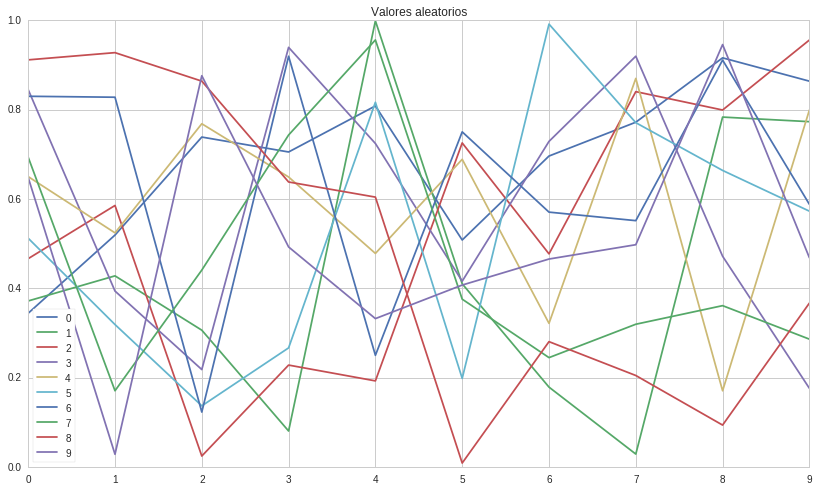

In [3]:
#pandas permite crear visualizaciones con unas cuantas lineas de codigo
values_1=pd.DataFrame(np.random.random((10,10)))
values_2=np.cumprod(values_1)
values_1.plot()
plt.title("Valores aleatorios")
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [4]:
"""s = pd.Series([1, 2, np.nan, 4, 5])
print s"""

's = pd.Series([1, 2, np.nan, 4, 5])\nprint s'

In [5]:
#las series en panda son arreglos unidimensionales
serie_1=pd.Series([2,4,6,np.nan,8,10])
serie_1

0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64

Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [6]:
"""print s.name"""

'print s.name'

This name can be directly modified with no repercussions.

In [7]:
"""s.name = "Toy Series"
print s.name"""

's.name = "Toy Series"\nprint s.name'

In [8]:
#las series en panda pueden recibir un nombre, si no lo tienen asignado, tendra un valor none
print "antes de seleccionar nombre: ", serie_1.name#si ya se ejecuto una vez,no imprimira none, imprimira el nombre
serie_1.name='pares'
print "Despues de seleccionar nombre: ", serie_1.name

antes de seleccionar nombre:  None
Despues de seleccionar nombre:  pares


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [9]:
"""print s.index"""

'print s.index'

In [10]:
#index imprime la cantidad de items dentro de la serie
print serie_1.index

RangeIndex(start=0, stop=6, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [11]:
"""new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index"""

'new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")\nprint new_index'

In [12]:
#pandas tambien puede generar fechas en un rango dado con la funcion dat_range
fecha=pd.date_range("2020-01-20", periods=len(serie_1),freq="D")
print fecha

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [13]:
"""s.index = new_index
print s.index"""

's.index = new_index\nprint s.index'

In [14]:
#para asignarle un nuevo index a una serie, tiene que tenerse en cuenta que ambos deben ser del mismo tamano
#por ello, los periodos de la anterior usan el tamano de la serie
serie_1.index=fecha

print "Nuevos valores del index de la serie:\n\n ",serie_1.index

Nuevos valores del index de la serie:

  DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [15]:
"""print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]"""

'print "First element of the series: ", s.iloc[0]\nprint "Last element of the series: ", s.iloc[len(s)-1]'

In [16]:
#para acceder a los datos de una serie, se puede usar la
#funcion iloc()(para acceder con integer) o loc()(con acceder con el index de la serie)
print "accediendo con iloc: ", serie_1.iloc[1]
print "accediendo con loc: ", serie_1.loc['2020-01-24']

accediendo con iloc:  4.0
accediendo con loc:  8.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [17]:
"""s.iloc[:2]"""

's.iloc[:2]'

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [18]:
"""start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]"""

'start = 0\nend = len(s) - 1\nstep = 1\n\ns.iloc[start:end:step]'

In [19]:
#al igual que en las listas de python, las series se pueden acceder como si fueran un array
print ("imprimiendo los valores desde el 3 hasta el 4: \n",serie_1.iloc[2:4])
#o especificando sus pasos
print ("\n\nImprimiendo desde el 2 hasta el 3 dando saltos de a 3:\n ", serie_1.iloc[1:3:3])

imprimiendo los valores desde el 3 hasta el 4: 
 2020-01-22    6.0
2020-01-23    NaN
Freq: D, Name: pares, dtype: float64


Imprimiendo desde el 2 hasta el 3 dando saltos de a 3:
  2020-01-21    4.0
Freq: 3D, Name: pares, dtype: float64


We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [20]:
"""s.iloc[::-1]"""

's.iloc[::-1]'

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [21]:
"""s.iloc[-2:-4:-1]"""

's.iloc[-2:-4:-1]'

In [22]:
#se pueden imprimir los datos al reves y/o seleccionar de atras para adelante
print ("imprimiendo al reves y desde la posicion 2: \n",serie_1.iloc[::-2])#imprimira al reves, y ademas desde la posicion 2 de atras hacia adelante

#los valores de indices pueden darse en negatico, especificando un conteo de atras para adelante
print("\n\nValores desde la 1 posicion de atras para adelante hasta el segundo:\n", serie_1.iloc[-1:2:-1])

imprimiendo al reves y desde la posicion 2: 
 2020-01-25    10.0
2020-01-23     NaN
2020-01-21     4.0
Freq: -2D, Name: pares, dtype: float64


Valores desde la 1 posicion de atras para adelante hasta el segundo:
 2020-01-25    10.0
2020-01-24     8.0
2020-01-23     NaN
Freq: -1D, Name: pares, dtype: float64


We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [23]:
"""s.loc['2016-01-01']"""

"s.loc['2016-01-01']"

Or even for a range of dates!

In [24]:
"""s.loc['2016-01-02':'2016-01-04']"""

"s.loc['2016-01-02':'2016-01-04']"

In [25]:
#tambien se puede acceder por el indice, en este caso fechas, o en su caso, rango de fechas
#Seleccionando dato en especifico
print("Dato de la fecha 2020-01-25: ",serie_1.loc["2020-01-25"])
#Seleccionando rangos
print ("\n\ndatos comprendidos entre 2020-01-22 y 2020-01-25:\n",serie_1.loc["2020-01-22":"2020-01-25"])

Dato de la fecha 2020-01-25:  10.0


datos comprendidos entre 2020-01-22 y 2020-01-25:
 2020-01-22     6.0
2020-01-23     NaN
2020-01-24     8.0
2020-01-25    10.0
Freq: D, Name: pares, dtype: float64


With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [26]:
"print s < 3"

'print s < 3'

In [27]:
#las series permiten comparaciones booleanas, estas retornan series con la tabla de verdad
print serie_1==6.0 

2020-01-20    False
2020-01-21    False
2020-01-22     True
2020-01-23    False
2020-01-24    False
2020-01-25    False
Freq: D, Name: pares, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [28]:
"""print s.loc[s < 3]"""

'print s.loc[s < 3]'

If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [29]:
"""print s.loc[(s < 3) & (s > 1)]"""

'print s.loc[(s < 3) & (s > 1)]'

In [30]:
#tambien se pueden filtrar los datos con la tabla resultado
print "valores de la serie con dato igual a 6: ", serie_1.loc[serie_1==6]
#y, al ser una comparacion logica, puede colocarse mas de un argumento
print "\n\nValores mayores a 4 o iguales a 2: \n", serie_1.loc[((serie_1>4)|(serie_1==2))]

valores de la serie con dato igual a 6:  2020-01-22    6.0
Freq: D, Name: pares, dtype: float64


Valores mayores a 4 o iguales a 2: 
 2020-01-20     2.0
2020-01-22     6.0
2020-01-24     8.0
2020-01-25    10.0
Name: pares, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [31]:
"""symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
prices"""

'symbol = "CMG"\nstart = "2012-01-01"\nend = "2016-01-01"\nprices = get_pricing(symbol, start_date=start, end_date=end, fields="price")\nprices'

In [32]:
precios=get_pricing("CMG",start_date="2018-05-20",end_date="2020-05-20",fields="price")
precios

2018-05-21 00:00:00+00:00     433.840
2018-05-22 00:00:00+00:00     433.440
2018-05-23 00:00:00+00:00     435.500
2018-05-24 00:00:00+00:00     433.410
2018-05-25 00:00:00+00:00     428.820
2018-05-29 00:00:00+00:00     433.010
2018-05-30 00:00:00+00:00     436.600
2018-05-31 00:00:00+00:00     430.230
2018-06-01 00:00:00+00:00     438.710
2018-06-04 00:00:00+00:00     443.745
2018-06-05 00:00:00+00:00     453.350
2018-06-06 00:00:00+00:00     453.800
2018-06-07 00:00:00+00:00     448.280
2018-06-08 00:00:00+00:00     453.260
2018-06-11 00:00:00+00:00     466.750
2018-06-12 00:00:00+00:00     466.300
2018-06-13 00:00:00+00:00     457.270
2018-06-14 00:00:00+00:00     460.280
2018-06-15 00:00:00+00:00     462.010
2018-06-18 00:00:00+00:00     468.460
2018-06-19 00:00:00+00:00     469.230
2018-06-20 00:00:00+00:00     465.500
2018-06-21 00:00:00+00:00     463.160
2018-06-22 00:00:00+00:00     469.850
2018-06-25 00:00:00+00:00     453.940
2018-06-26 00:00:00+00:00     461.480
2018-06-27 0

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [33]:
"""print "\n", type(prices)
prices.head(5) """

'print "\n", type(prices)\nprices.head(5) '

In [34]:
#Podemos conocer el tipo de variables que tienen los datos recien generados en la serie
print type(precios)
precios.head()

<class 'pandas.core.series.Series'>


2018-05-21 00:00:00+00:00    433.84
2018-05-22 00:00:00+00:00    433.44
2018-05-23 00:00:00+00:00    435.50
2018-05-24 00:00:00+00:00    433.41
2018-05-25 00:00:00+00:00    428.82
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [35]:
"""print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name"""

"print 'Old name: ', prices.name\nprices.name = symbol\nprint 'New name: ', prices.name"

In [36]:
#se puede cambien el nombre de la serie, por el nombre que se quiera de la siguiente forma
precios.name="fecha"
precios

2018-05-21 00:00:00+00:00     433.840
2018-05-22 00:00:00+00:00     433.440
2018-05-23 00:00:00+00:00     435.500
2018-05-24 00:00:00+00:00     433.410
2018-05-25 00:00:00+00:00     428.820
2018-05-29 00:00:00+00:00     433.010
2018-05-30 00:00:00+00:00     436.600
2018-05-31 00:00:00+00:00     430.230
2018-06-01 00:00:00+00:00     438.710
2018-06-04 00:00:00+00:00     443.745
2018-06-05 00:00:00+00:00     453.350
2018-06-06 00:00:00+00:00     453.800
2018-06-07 00:00:00+00:00     448.280
2018-06-08 00:00:00+00:00     453.260
2018-06-11 00:00:00+00:00     466.750
2018-06-12 00:00:00+00:00     466.300
2018-06-13 00:00:00+00:00     457.270
2018-06-14 00:00:00+00:00     460.280
2018-06-15 00:00:00+00:00     462.010
2018-06-18 00:00:00+00:00     468.460
2018-06-19 00:00:00+00:00     469.230
2018-06-20 00:00:00+00:00     465.500
2018-06-21 00:00:00+00:00     463.160
2018-06-22 00:00:00+00:00     469.850
2018-06-25 00:00:00+00:00     453.940
2018-06-26 00:00:00+00:00     461.480
2018-06-27 0

Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [37]:
"""print prices.index"""

'print prices.index'

In [38]:
print precios.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-04',
               ...
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns, UTC]', length=504, freq='C')


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [39]:
"""monthly_prices = prices.resample('M')
monthly_prices.head(10)"""

"monthly_prices = prices.resample('M')\nmonthly_prices.head(10)"

In [40]:
#calcula el promedio dado un parametro de tiempo con resample
precios_anuales=precios.resample("A").mean()
precios_anuales.head()

2018-12-31 00:00:00+00:00    461.151297
2019-12-31 00:00:00+00:00    722.893726
2020-12-31 00:00:00+00:00    808.831907
Freq: A-DEC, Name: fecha, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [41]:
"""monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)"""

"monthly_prices_med = prices.resample('M', how='median')\nmonthly_prices_med.head(10)"

In [42]:
#el valor how fue cambiado por . seguido del valor especificado, como se ve en el caso anterior, o en este
precios_anuales_mediana=precios.resample("A").median()
precios_anuales_mediana

2018-12-31 00:00:00+00:00    462.01
2019-12-31 00:00:00+00:00    737.36
2020-12-31 00:00:00+00:00    862.54
Freq: A-DEC, Name: fecha, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [43]:
"""def custom_resampler(array_like):
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)"""

"def custom_resampler(array_like):\n    return array_like[0]\n\nfirst_of_month_prices = prices.resample('M', how=custom_resampler)\nfirst_of_month_prices.head(10)"

In [44]:
#recordar que la notacion cambio, para aplicar funciones aparte, se usa la subfuncion 'apply'
def custom_resampler(array):
    return array[0]

un_valor_de_esos=precios.resample("A").apply(custom_resampler)
un_valor_de_esos

2018-12-31 00:00:00+00:00    433.84
2019-12-31 00:00:00+00:00    443.33
2020-12-31 00:00:00+00:00    857.69
Freq: A-DEC, Name: fecha, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [45]:
"""eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)"""

"eastern_prices = prices.tz_convert('US/Eastern')\neastern_prices.head(10)"

In [46]:
#tz_convert cambia la zona horaria de los datos
precios_cambio=precios.tz_convert('Indian/Christmas')
precios_cambio

2018-05-21 07:00:00+07:00     433.840
2018-05-22 07:00:00+07:00     433.440
2018-05-23 07:00:00+07:00     435.500
2018-05-24 07:00:00+07:00     433.410
2018-05-25 07:00:00+07:00     428.820
2018-05-29 07:00:00+07:00     433.010
2018-05-30 07:00:00+07:00     436.600
2018-05-31 07:00:00+07:00     430.230
2018-06-01 07:00:00+07:00     438.710
2018-06-04 07:00:00+07:00     443.745
2018-06-05 07:00:00+07:00     453.350
2018-06-06 07:00:00+07:00     453.800
2018-06-07 07:00:00+07:00     448.280
2018-06-08 07:00:00+07:00     453.260
2018-06-11 07:00:00+07:00     466.750
2018-06-12 07:00:00+07:00     466.300
2018-06-13 07:00:00+07:00     457.270
2018-06-14 07:00:00+07:00     460.280
2018-06-15 07:00:00+07:00     462.010
2018-06-18 07:00:00+07:00     468.460
2018-06-19 07:00:00+07:00     469.230
2018-06-20 07:00:00+07:00     465.500
2018-06-21 07:00:00+07:00     463.160
2018-06-22 07:00:00+07:00     469.850
2018-06-25 07:00:00+07:00     453.940
2018-06-26 07:00:00+07:00     461.480
2018-06-27 0

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [47]:
"""calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates"""

"calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')\nprint calendar_dates"

In [48]:
#la forma de fechas con get_pricing no contiene dias festivos o fines, para usarlos podemos usar lo siguiente
fechas=pd.date_range(start="2018-05-20",end="2020-05-20",freq='D',tz="UTC")
print fechas

DatetimeIndex(['2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27',
               '2018-05-28', '2018-05-29',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns, UTC]', length=732, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [49]:
"""calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)"""

"calendar_prices = prices.reindex(calendar_dates, method='ffill')\ncalendar_prices.head(15)"

In [50]:
#ahora asignando precios y/o valores a cada dia
fecha_precios=precios.reindex(fechas,method="ffill")
fecha_precios.head()#los valores Nan representan a los dias donde no hubo ningun valor asociado(domingos y/o festivos)

2018-05-20 00:00:00+00:00       NaN
2018-05-21 00:00:00+00:00    433.84
2018-05-22 00:00:00+00:00    433.44
2018-05-23 00:00:00+00:00    435.50
2018-05-24 00:00:00+00:00    433.41
Freq: D, Name: fecha, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [51]:
"""meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)"""

'meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())\nmeanfilled_prices.head(10)'

In [52]:
#para evitar los valores nulos, podemos usar la funcion fillna
promedio_precios=fecha_precios.fillna(fecha_precios.mean())
promedio_precios.head()

2018-05-20 00:00:00+00:00    658.514754
2018-05-21 00:00:00+00:00    433.840000
2018-05-22 00:00:00+00:00    433.440000
2018-05-23 00:00:00+00:00    435.500000
2018-05-24 00:00:00+00:00    433.410000
Freq: D, Name: fecha, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [53]:
"""bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)"""

"bfilled_prices = calendar_prices.fillna(method='bfill')\nbfilled_prices.head(10)"

In [54]:
back_filld=fecha_precios.fillna(method='bfill')
back_filld.head()

2018-05-20 00:00:00+00:00    433.84
2018-05-21 00:00:00+00:00    433.84
2018-05-22 00:00:00+00:00    433.44
2018-05-23 00:00:00+00:00    435.50
2018-05-24 00:00:00+00:00    433.41
Freq: D, Name: fecha, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [55]:
"""dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)"""

'dropped_prices = calendar_prices.dropna()\ndropped_prices.head(10)'

In [56]:
#las opciones anteriores poseen inconvenientes que hace que su uso no sea muy aconcejado,aqui hay otra opcion

prizes_dropp=fecha_precios.dropna()
print "Sin valores Nan:\n",prizes_dropp.head()
print "\nCon valores Nan:\n",fecha_precios.head()

Sin valores Nan:
 2018-05-21 00:00:00+00:00    433.84
2018-05-22 00:00:00+00:00    433.44
2018-05-23 00:00:00+00:00    435.50
2018-05-24 00:00:00+00:00    433.41
2018-05-25 00:00:00+00:00    428.82
Freq: D, Name: fecha, dtype: float64

Con valores Nan:
 2018-05-20 00:00:00+00:00       NaN
2018-05-21 00:00:00+00:00    433.84
2018-05-22 00:00:00+00:00    433.44
2018-05-23 00:00:00+00:00    435.50
2018-05-24 00:00:00+00:00    433.41
Freq: D, Name: fecha, dtype: float64


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

In [57]:
"""prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");"""

'prices.plot();\n# We still need to add the axis labels and title ourselves\nplt.title(symbol + " Prices")\nplt.ylabel("Price")\nplt.xlabel("Date");'

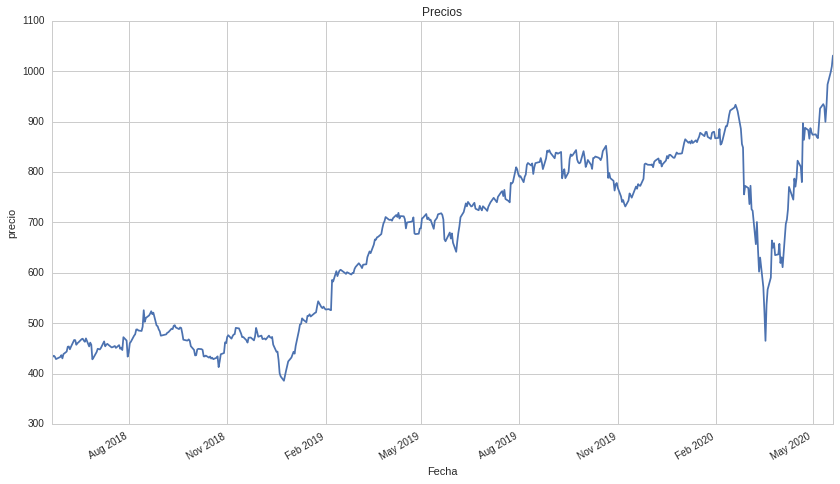

In [58]:
#para graficar en python con pandas, se usa el objeto pandas con la funcion plot

precios.plot();
plt.title("Precios")
plt.ylabel("precio")
plt.xlabel("Fecha")

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [59]:
"""print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()"""

'print "Mean: ", prices.mean()\nprint "Standard deviation: ", prices.std()'

In [60]:
#Algunas funciones estadisticas que nos ofrece pandas son media, mediana,desviacion estandar,etc...
print  "Mediana: ", precios.median()
print "Valor maximo: ",precios.max()

Mediana:  700.3199999999999
Valor maximo:  1030.93


In [61]:
"""print "Summary Statistics"
print prices.describe()"""

'print "Summary Statistics"\nprint prices.describe()'

In [62]:
#ademas, la funcion describe da un resumen de los valores estadisticos principales de un conjunto de datos
precios.describe()

count     504.000000
mean      658.937232
std       162.139056
min       385.840000
25%       479.957500
50%       700.320000
75%       810.567500
max      1030.930000
Name: fecha, dtype: float64

We can easily modify `Series` with scalars using our basic mathematical operators.

In [63]:
"""modified_prices = prices * 2 - 10
modified_prices.head(5)"""

'modified_prices = prices * 2 - 10\nmodified_prices.head(5)'

In [64]:
#pandas permite operaciones de escalares con los arreglos
print precios*5+2

2018-05-21 00:00:00+00:00    2171.200
2018-05-22 00:00:00+00:00    2169.200
2018-05-23 00:00:00+00:00    2179.500
2018-05-24 00:00:00+00:00    2169.050
2018-05-25 00:00:00+00:00    2146.100
2018-05-29 00:00:00+00:00    2167.050
2018-05-30 00:00:00+00:00    2185.000
2018-05-31 00:00:00+00:00    2153.150
2018-06-01 00:00:00+00:00    2195.550
2018-06-04 00:00:00+00:00    2220.725
2018-06-05 00:00:00+00:00    2268.750
2018-06-06 00:00:00+00:00    2271.000
2018-06-07 00:00:00+00:00    2243.400
2018-06-08 00:00:00+00:00    2268.300
2018-06-11 00:00:00+00:00    2335.750
2018-06-12 00:00:00+00:00    2333.500
2018-06-13 00:00:00+00:00    2288.350
2018-06-14 00:00:00+00:00    2303.400
2018-06-15 00:00:00+00:00    2312.050
2018-06-18 00:00:00+00:00    2344.300
2018-06-19 00:00:00+00:00    2348.150
2018-06-20 00:00:00+00:00    2329.500
2018-06-21 00:00:00+00:00    2317.800
2018-06-22 00:00:00+00:00    2351.250
2018-06-25 00:00:00+00:00    2271.700
2018-06-26 00:00:00+00:00    2309.400
2018-06-27 0

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [65]:
"""noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)"""

'noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20\nnoisy_prices.head(5)'

In [66]:
#ya que permite operaciones con escalares, se pueden hacer combinaciones lineales
print precios*pd.Series(np.random.normal(0,6,len(precios)),index=precios.index)%33

2018-05-21 00:00:00+00:00    26.994267
2018-05-22 00:00:00+00:00    23.815509
2018-05-23 00:00:00+00:00    30.703724
2018-05-24 00:00:00+00:00    18.362069
2018-05-25 00:00:00+00:00     8.636433
2018-05-29 00:00:00+00:00     2.177162
2018-05-30 00:00:00+00:00     9.993066
2018-05-31 00:00:00+00:00    16.967157
2018-06-01 00:00:00+00:00    16.149525
2018-06-04 00:00:00+00:00    29.897727
2018-06-05 00:00:00+00:00    17.384785
2018-06-06 00:00:00+00:00    30.031899
2018-06-07 00:00:00+00:00    29.992883
2018-06-08 00:00:00+00:00    28.912255
2018-06-11 00:00:00+00:00    14.135249
2018-06-12 00:00:00+00:00     7.486724
2018-06-13 00:00:00+00:00    20.919969
2018-06-14 00:00:00+00:00    18.161783
2018-06-15 00:00:00+00:00    24.928099
2018-06-18 00:00:00+00:00    13.293998
2018-06-19 00:00:00+00:00    28.066760
2018-06-20 00:00:00+00:00    31.209245
2018-06-21 00:00:00+00:00     1.382453
2018-06-22 00:00:00+00:00    17.335452
2018-06-25 00:00:00+00:00    17.784808
2018-06-26 00:00:00+00:00

If there are no matching indices, however, we may get an empty `Series` in return.

In [67]:
"""empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)"""

'empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))\nempty_series.head(5)'

In [68]:
print precios*pd.Series(np.random.normal(0,6,len(precios)))%33

2018-05-21 00:00:00+00:00   NaN
2018-05-22 00:00:00+00:00   NaN
2018-05-23 00:00:00+00:00   NaN
2018-05-24 00:00:00+00:00   NaN
2018-05-25 00:00:00+00:00   NaN
2018-05-29 00:00:00+00:00   NaN
2018-05-30 00:00:00+00:00   NaN
2018-05-31 00:00:00+00:00   NaN
2018-06-01 00:00:00+00:00   NaN
2018-06-04 00:00:00+00:00   NaN
2018-06-05 00:00:00+00:00   NaN
2018-06-06 00:00:00+00:00   NaN
2018-06-07 00:00:00+00:00   NaN
2018-06-08 00:00:00+00:00   NaN
2018-06-11 00:00:00+00:00   NaN
2018-06-12 00:00:00+00:00   NaN
2018-06-13 00:00:00+00:00   NaN
2018-06-14 00:00:00+00:00   NaN
2018-06-15 00:00:00+00:00   NaN
2018-06-18 00:00:00+00:00   NaN
2018-06-19 00:00:00+00:00   NaN
2018-06-20 00:00:00+00:00   NaN
2018-06-21 00:00:00+00:00   NaN
2018-06-22 00:00:00+00:00   NaN
2018-06-25 00:00:00+00:00   NaN
2018-06-26 00:00:00+00:00   NaN
2018-06-27 00:00:00+00:00   NaN
2018-06-28 00:00:00+00:00   NaN
2018-06-29 00:00:00+00:00   NaN
2018-07-02 00:00:00+00:00   NaN
                             ..
474     

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [69]:
"""add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]"""

'add_returns = prices.diff()[1:]\nmult_returns = prices.pct_change()[1:]'

In [70]:
aditivo=precios.diff()[1:]
multiplicativo=precios.pct_change()[1:]

In [71]:
"""plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();"""

'plt.title("Multiplicative returns of " + symbol)\nplt.xlabel("Date")\nplt.ylabel("Percent Returns")\nmult_returns.plot();'

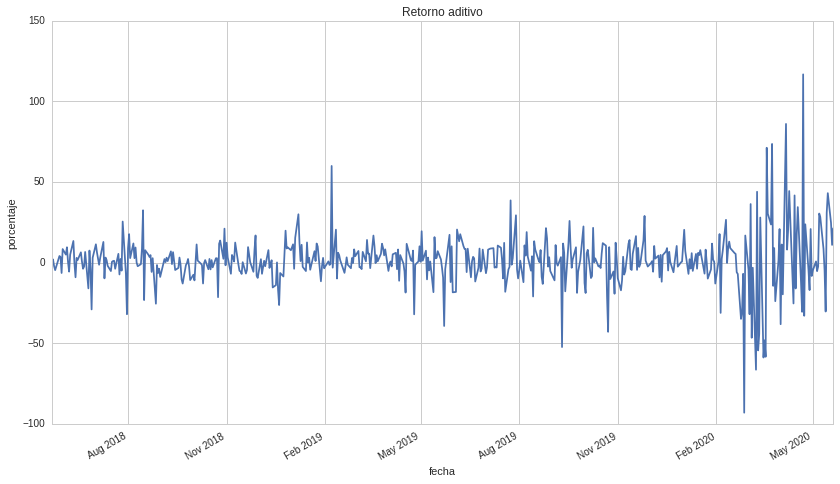

In [72]:
#graficamos el retorno aditivo
aditivo.plot();
plt.title("Retorno aditivo")
plt.xlabel("fecha")
plt.ylabel("porcentaje")

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [73]:
"""rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"""

'rolling_mean = pd.rolling_mean(prices, 30)\nrolling_mean.name = "30-day rolling mean'

In [74]:
"""prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();"""

'prices.plot()\nrolling_mean.plot()\nplt.title(symbol + "Price")\nplt.xlabel("Date")\nplt.ylabel("Price")\nplt.legend();'

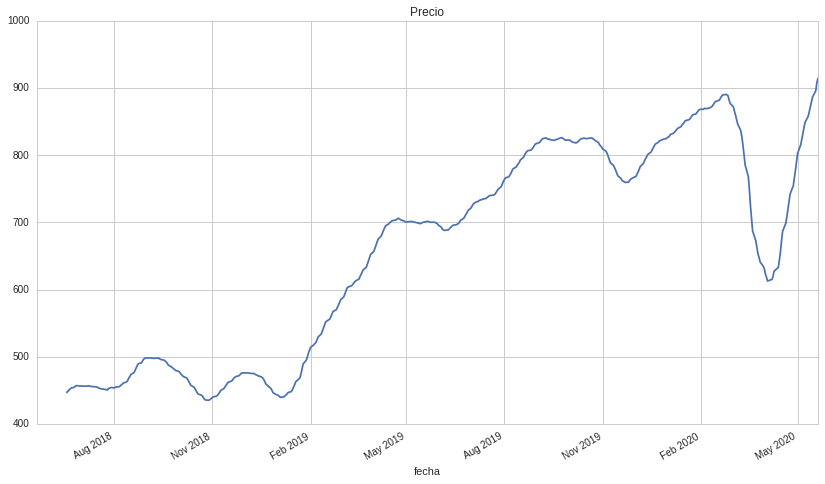

In [75]:
media=pd.Series.rolling(precios,20).mean()
media.name="media"

media.plot()
plt.title("Precio")
plt.xlabel("fecha")

In [76]:
"""rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"""

'rolling_std = pd.rolling_std(prices, 30)\nrolling_std.name = "30-day rolling volatility'

In [77]:
"""rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");"""

'rolling_std.plot()\nplt.title(rolling_std.name);\nplt.xlabel("Date")\nplt.ylabel("Standard Deviation");'

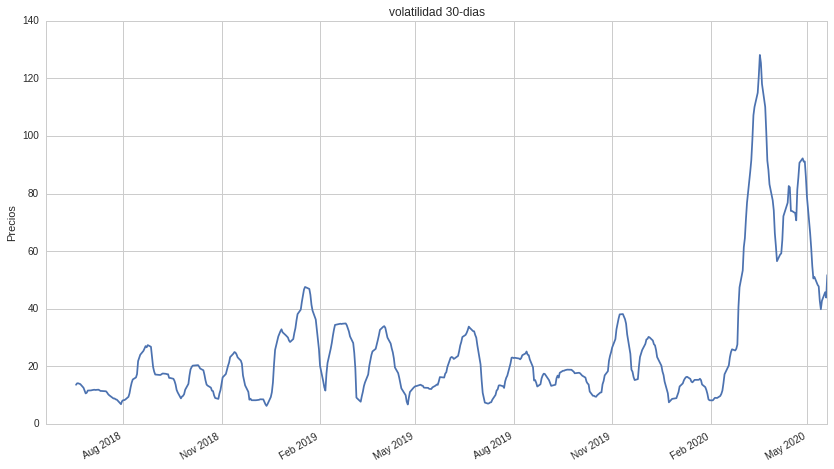

In [78]:
estandar=pd.Series.rolling(precios,20).std()
estandar.name="volatilidad 30-dias"

#zona de graficacion
estandar.plot();
plt.title(estandar.name)
plt.ylabel("Precios")

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [79]:
"""print np.median(mult_returns)"""

'print np.median(mult_returns)'

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [80]:
"""print mult_returns.median()"""

'print mult_returns.median()'

In [81]:
#varias funciones de numpy funcionan en las series, mas muchas de estas ya tienen su propia implementacion
#implementacion de numpy
print "Media calculada con numpy: ",np.mean(aditivo)
#implementacion propia
print "Media implementada por la serie: ",aditivo.mean()

Media calculada con numpy:  1.187057654075547
Media implementada por la serie:  1.187057654075547


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [82]:
"""dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data"""

"dict_data = {\n    'a' : [1, 2, 3, 4, 5],\n    'b' : ['L', 'K', 'J', 'M', 'Z'],\n    'c' : np.random.normal(0, 1, 5)\n}\nprint dict_data"

In [83]:
diccionario={
    "primero":[2,4,6,8,10],
    "segundo":["a","b","c","d",'e'],
    "tercero":np.random.normal(0,2,5)
}
diccionario["primero"]

[2, 4, 6, 8, 10]

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [84]:
"""frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data"""

"frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))\nprint frame_data"

In [85]:
#los data frames son conjuntos de celdas estilo excel

frame=pd.DataFrame(diccionario,index=pd.date_range("2018-02-18",periods=5))
frame

,primero,segundo,tercero
2018-02-18,2,a,-2.009218
2018-02-19,4,b,-1.782962
2018-02-20,6,c,-2.255673
2018-02-21,8,d,-0.492941
2018-02-22,10,e,1.818312


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [86]:
"""s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers"""

's_1 = pd.Series([2, 4, 6, 8, 10], name=\'Evens\')\ns_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")\nnumbers = pd.concat([s_1, s_2], axis=1)\nprint numbers'

In [87]:
#al concatenar dos series, se genera un data frame con las dos series como columnas
serie_1=pd.Series([1,2,5,13],name="fibo")
serie_2=pd.Series([1,3,8,21],name="nacci")
fibo_nacci=pd.concat([serie_1,serie_2],axis=1)
fibo_nacci

,fibo,nacci
0,1,1
1,2,3
2,5,8
3,13,21


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [88]:
"""print numbers.columns"""

'print numbers.columns'

To modify the columns after object creation, we need only do the following:

In [89]:
"""numbers.columns = ['Shmevens', 'Shmodds']
print numbers"""

"numbers.columns = ['Shmevens', 'Shmodds']\nprint numbers"

In the same vein, the index of a `DataFrame` can be changed after the fact.

In [90]:
"""print numbers.index"""

'print numbers.index'

In [91]:
#columns nos devuelve el nombre de las columnas que tiene el frame
print fibo_nacci.columns
#esos nombres pueden ser cambiados
fibo_nacci.columns=['naci','fiibo']
print "\nCambiando el nombre de las columnas:\n", fibo_nacci

Index(['fibo', 'nacci'], dtype='object')

Cambiando el nombre de las columnas:
    naci  fiibo
0     1      1
1     2      3
2     5      8
3    13     21


In [92]:
"""numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers"""

'numbers.index = pd.date_range("2016-01-01", periods=len(numbers))\nprint numbers'

In [93]:
#modificando el valor del index

fibo_nacci.index=pd.date_range("2020,8,20", periods=len(fibo_nacci))
fibo_nacci

,naci,fiibo
2020-08-20,1,1
2020-08-21,2,3
2020-08-22,5,8
2020-08-23,13,21


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [94]:
"""numbers.values"""

'numbers.values'

This returns a NumPy array.

In [95]:
"""type(numbers.values)"""

'type(numbers.values)'

In [96]:
#para obtener los valores del frame se usa .values
print fibo_nacci.values

print "el tipo de dato es : ",type(fibo_nacci.values)

[[ 1  1]
 [ 2  3]
 [ 5  8]
 [13 21]]
el tipo de dato es :  <class 'numpy.ndarray'>


#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [97]:
"""symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol"""

'symbol = ["CMG", "MCD", "SHAK", "WFM"]\nstart = "2012-01-01"\nend = "2016-01-01"\nprices = get_pricing(symbol, start_date=start, end_date=end, fields="price")\nif isinstance(symbol, list):\n    prices.columns = map(lambda x: x.symbol, prices.columns)\nelse:\n    prices.name = symbol'

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [98]:
"""prices.CMG.head()"""

'prices.CMG.head()'

In [99]:
simbolos = ["CMG", "MCD", "SHAK", "WFM"]
ano_inicio="2020-01-01"
ano_fin="2020-02-02"
precios=get_pricing(simbolos,ano_inicio,ano_fin,fields="price")
if isinstance(simbolos,list):
    precios.columns=map(lambda x:x.symbol, precios.columns)
else:
    precios.name=symbol
  

precios.MCD.head()

2020-01-02 00:00:00+00:00    200.80
2020-01-03 00:00:00+00:00    200.02
2020-01-06 00:00:00+00:00    202.33
2020-01-07 00:00:00+00:00    202.63
2020-01-08 00:00:00+00:00    205.87
Freq: C, Name: MCD, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [100]:
"""prices.loc[:, 'CMG'].head()"""

"prices.loc[:, 'CMG'].head()"

In [101]:
#accediendo con loc
precios.loc[:,'SHAK']

2020-01-02 00:00:00+00:00    61.130
2020-01-03 00:00:00+00:00    60.480
2020-01-06 00:00:00+00:00    59.570
2020-01-07 00:00:00+00:00    61.270
2020-01-08 00:00:00+00:00    62.030
2020-01-09 00:00:00+00:00    61.190
2020-01-10 00:00:00+00:00    61.120
2020-01-13 00:00:00+00:00    60.325
2020-01-14 00:00:00+00:00    64.100
2020-01-15 00:00:00+00:00    68.450
2020-01-16 00:00:00+00:00    70.460
2020-01-17 00:00:00+00:00    69.900
2020-01-21 00:00:00+00:00    70.090
2020-01-22 00:00:00+00:00    70.760
2020-01-23 00:00:00+00:00    70.870
2020-01-24 00:00:00+00:00    68.431
2020-01-27 00:00:00+00:00    66.390
2020-01-28 00:00:00+00:00    67.390
2020-01-29 00:00:00+00:00    68.120
2020-01-30 00:00:00+00:00    67.847
2020-01-31 00:00:00+00:00    67.440
Freq: C, Name: SHAK, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [102]:
"""print type(prices.CMG)
print type(prices.loc[:, 'CMG'])"""

"print type(prices.CMG)\nprint type(prices.loc[:, 'CMG'])"

In [103]:
print type(precios.SHAK)
print type(precios.loc[:,"SHAK"])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [104]:
"""prices.loc[:, ['CMG', 'MCD']].head()"""

"prices.loc[:, ['CMG', 'MCD']].head()"

In [105]:
precios.loc[:,["SHAK","CMG"]].head()

,SHAK,CMG
2020-01-02 00:00:00+00:00,61.13,857.69
2020-01-03 00:00:00+00:00,60.48,864.95
2020-01-06 00:00:00+00:00,59.57,858.03
2020-01-07 00:00:00+00:00,61.27,860.21
2020-01-08 00:00:00+00:00,62.03,856.59


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [106]:
"""prices.loc['2015-12-15':'2015-12-22']"""

"prices.loc['2015-12-15':'2015-12-22']"

This plays nicely with lists of columns, too.

In [107]:
"""prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]"""

"prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]"

In [108]:
#se puede acceder a los datos de un frame de la misma forma que en una serie
print precios.loc["2020-01-03":"2020-01-08"]


#o seleccionar las columnas especificas
print precios.loc["2020-01-03":"2020-01-08",["CMG"]]

                              CMG     MCD   SHAK  WFM
2020-01-03 00:00:00+00:00  864.95  200.02  60.48  NaN
2020-01-06 00:00:00+00:00  858.03  202.33  59.57  NaN
2020-01-07 00:00:00+00:00  860.21  202.63  61.27  NaN
2020-01-08 00:00:00+00:00  856.59  205.87  62.03  NaN
                              CMG
2020-01-03 00:00:00+00:00  864.95
2020-01-06 00:00:00+00:00  858.03
2020-01-07 00:00:00+00:00  860.21
2020-01-08 00:00:00+00:00  856.59


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [109]:
"""prices.iloc[0:2, 1]"""

'prices.iloc[0:2, 1]'

In [110]:
precios.iloc[1:3,2:4]

,SHAK,WFM
2020-01-03 00:00:00+00:00,60.48,NaN
2020-01-06 00:00:00+00:00,59.57,NaN


In [111]:
"""# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)"""

'# Access prices with integer index in\n# [1, 3, 5, 7, 9, 11, 13, ..., 99]\n# and in column 0 or 3\nprices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)'

In [112]:

precios.iloc[[0,2,4],[1,3]].head()

,MCD,WFM
2020-01-02 00:00:00+00:00,200.80,NaN
2020-01-06 00:00:00+00:00,202.33,NaN
2020-01-08 00:00:00+00:00,205.87,NaN


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [113]:
"""prices.loc[prices.MCD > prices.WFM].head()"""

'prices.loc[prices.MCD > prices.WFM].head()'

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [114]:
"""prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()"""

'prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()'

In [115]:
#se pueden usar operadores booleanos para generar operaciones logicas y con ellas seleccionar datos
precios.loc[~(precios.SHAK>precios.MCD)|(precios.WFM==52.10)].head()

,CMG,MCD,SHAK,WFM
2020-01-02 00:00:00+00:00,857.69,200.80,61.13,NaN
2020-01-03 00:00:00+00:00,864.95,200.02,60.48,NaN
2020-01-06 00:00:00+00:00,858.03,202.33,59.57,NaN
2020-01-07 00:00:00+00:00,860.21,202.63,61.27,NaN
2020-01-08 00:00:00+00:00,856.59,205.87,62.03,NaN


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [116]:
"""s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)"""

"s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')\nprices.loc[:, 'TSLA'] = s_1\nprices.head(5)"

In [117]:
select_1=get_pricing('OTR',ano_inicio,ano_fin,fields="price")
precios.loc[:,"OTR"]=select_1
precios.head()

,CMG,MCD,SHAK,WFM,OTR
2020-01-02 00:00:00+00:00,857.69,200.80,61.13,NaN,NaN
2020-01-03 00:00:00+00:00,864.95,200.02,60.48,NaN,NaN
2020-01-06 00:00:00+00:00,858.03,202.33,59.57,NaN,NaN
2020-01-07 00:00:00+00:00,860.21,202.63,61.27,NaN,NaN
2020-01-08 00:00:00+00:00,856.59,205.87,62.03,NaN,NaN


It is also just as easy to remove a column.

In [118]:
"""prices = prices.drop('TSLA', axis=1)
prices.head(5)"""

"prices = prices.drop('TSLA', axis=1)\nprices.head(5)"

In [119]:
precios=precios.drop('OTR', axis=1)
precios.head()

,CMG,MCD,SHAK,WFM
2020-01-02 00:00:00+00:00,857.69,200.80,61.13,NaN
2020-01-03 00:00:00+00:00,864.95,200.02,60.48,NaN
2020-01-06 00:00:00+00:00,858.03,202.33,59.57,NaN
2020-01-07 00:00:00+00:00,860.21,202.63,61.27,NaN
2020-01-08 00:00:00+00:00,856.59,205.87,62.03,NaN


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [120]:
"""df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()"""

"df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')\ndf_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')\ndf_3 = pd.concat([df_1, df_2], axis=1)\ndf_3.head()"

In [121]:
frame_1=get_pricing(["SOL","AAPL"],ano_inicio,ano_fin,fields="price")
frame_2=get_pricing(["SAL","LEN"],ano_inicio,ano_fin,fields="price")
frame_3=pd.concat([frame_1,frame_2],axis=1)
frame_3

,Equity(35651 [SOL]),Equity(24 [AAPL]),Equity(10034 [SAL]),Equity(4417 [LEN])
2020-01-02 00:00:00+00:00,1.402,300.59,45.250,55.704
2020-01-03 00:00:00+00:00,1.390,297.38,44.730,56.353
2020-01-06 00:00:00+00:00,1.320,299.78,43.550,57.940
2020-01-07 00:00:00+00:00,1.295,298.27,43.500,57.041
2020-01-08 00:00:00+00:00,1.320,303.15,43.410,57.500
2020-01-09 00:00:00+00:00,1.350,309.71,43.410,57.590
2020-01-10 00:00:00+00:00,1.360,310.37,43.500,59.606
2020-01-13 00:00:00+00:00,1.385,316.94,43.500,60.430
2020-01-14 00:00:00+00:00,1.370,312.69,43.639,61.523
2020-01-15 00:00:00+00:00,1.400,311.50,43.650,62.671


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [122]:
"""filled0_prices = prices.fillna(0)
filled0_prices.head(5)"""

'filled0_prices = prices.fillna(0)\nfilled0_prices.head(5)'

In [123]:
#eliminando datos faltantantes
print precios.fillna(0)

                               CMG      MCD    SHAK  WFM
2020-01-02 00:00:00+00:00  857.690  200.800  61.130  0.0
2020-01-03 00:00:00+00:00  864.950  200.020  60.480  0.0
2020-01-06 00:00:00+00:00  858.030  202.330  59.570  0.0
2020-01-07 00:00:00+00:00  860.210  202.630  61.270  0.0
2020-01-08 00:00:00+00:00  856.590  205.870  62.030  0.0
2020-01-09 00:00:00+00:00  862.540  208.320  61.190  0.0
2020-01-10 00:00:00+00:00  857.470  207.290  61.120  0.0
2020-01-13 00:00:00+00:00  862.940  206.360  60.325  0.0
2020-01-14 00:00:00+00:00  859.220  207.300  64.100  0.0
2020-01-15 00:00:00+00:00  865.320  209.660  68.450  0.0
2020-01-16 00:00:00+00:00  870.055  210.950  70.460  0.0
2020-01-17 00:00:00+00:00  877.890  211.910  69.900  0.0
2020-01-21 00:00:00+00:00  871.130  211.040  70.090  0.0
2020-01-22 00:00:00+00:00  879.250  211.420  70.760  0.0
2020-01-23 00:00:00+00:00  879.580  213.400  70.870  0.0
2020-01-24 00:00:00+00:00  869.740  211.190  68.431  0.0
2020-01-27 00:00:00+00:00  865.

In [124]:
"""bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)"""

"bfilled_prices = prices.fillna(method='bfill')\nbfilled_prices.head(5)"

In [125]:
print precios.fillna(method='bfill')

                               CMG      MCD    SHAK  WFM
2020-01-02 00:00:00+00:00  857.690  200.800  61.130  NaN
2020-01-03 00:00:00+00:00  864.950  200.020  60.480  NaN
2020-01-06 00:00:00+00:00  858.030  202.330  59.570  NaN
2020-01-07 00:00:00+00:00  860.210  202.630  61.270  NaN
2020-01-08 00:00:00+00:00  856.590  205.870  62.030  NaN
2020-01-09 00:00:00+00:00  862.540  208.320  61.190  NaN
2020-01-10 00:00:00+00:00  857.470  207.290  61.120  NaN
2020-01-13 00:00:00+00:00  862.940  206.360  60.325  NaN
2020-01-14 00:00:00+00:00  859.220  207.300  64.100  NaN
2020-01-15 00:00:00+00:00  865.320  209.660  68.450  NaN
2020-01-16 00:00:00+00:00  870.055  210.950  70.460  NaN
2020-01-17 00:00:00+00:00  877.890  211.910  69.900  NaN
2020-01-21 00:00:00+00:00  871.130  211.040  70.090  NaN
2020-01-22 00:00:00+00:00  879.250  211.420  70.760  NaN
2020-01-23 00:00:00+00:00  879.580  213.400  70.870  NaN
2020-01-24 00:00:00+00:00  869.740  211.190  68.431  NaN
2020-01-27 00:00:00+00:00  865.

But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [126]:
"""dropped_prices = prices.dropna()
dropped_prices.head(5)"""

'dropped_prices = prices.dropna()\ndropped_prices.head(5)'

In [127]:
print precios.dropna()

Empty DataFrame
Columns: [CMG, MCD, SHAK, WFM]
Index: []


In [128]:
"""prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");"""

'prices.plot()\nplt.title("Collected Stock Prices")\nplt.ylabel("Price")\nplt.xlabel("Date");'

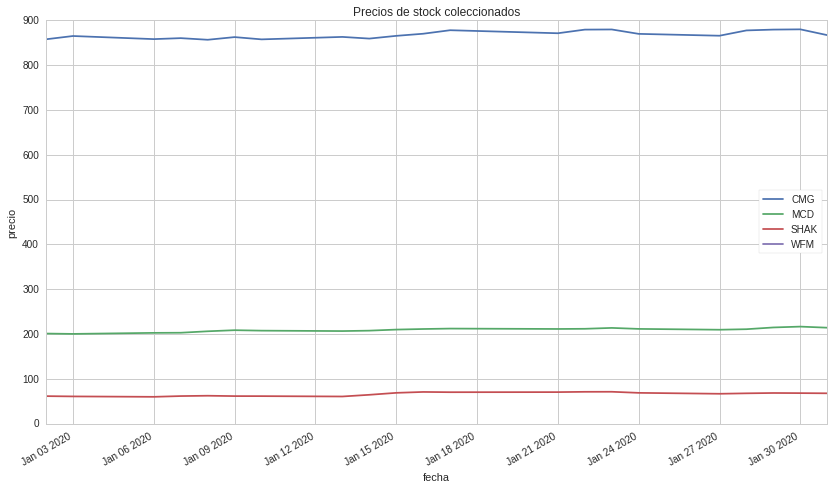

In [129]:
precios.plot()
plt.title("Precios de stock coleccionados")
plt.ylabel("precio")
plt.xlabel("fecha")

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [130]:
"""prices.mean(axis=0)"""

'prices.mean(axis=0)'

As well as the standard deviation:

In [131]:
"""prices.std(axis=0)"""

'prices.std(axis=0)'

In [132]:
#algunos datos estadisticos
print "Medianas: \n",precios.median(axis=0)
print "\n\nDesviacion Estandar: \n",precios.std(axis=0)

Medianas: 
 CMG     865.61
MCD     209.66
SHAK     67.39
WFM        NaN
dtype: float64


Desviacion Estandar: 
 CMG     8.349068
MCD     4.534817
SHAK    4.093042
WFM          NaN
dtype: float64


Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [133]:
"""prices.describe()"""

'prices.describe()'

In [134]:
precios.describe()

/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM
count,21.000000,21.000000,21.000000,0.0
mean,867.701190,208.809333,65.588714,NaN
std,8.349068,4.534817,4.093042,NaN
min,856.590000,200.020000,59.570000,NaN
25%,860.210000,206.360000,61.190000,NaN
50%,865.610000,209.660000,67.390000,NaN
75%,877.450000,211.420000,68.450000,NaN
max,879.840000,216.316000,70.870000,NaN


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [135]:
"""(2 * prices - 50).head(5)"""

'(2 * prices - 50).head(5)'

In [136]:
#operaciones con escalares
(precios*10/40).head()


,CMG,MCD,SHAK,WFM
2020-01-02 00:00:00+00:00,214.4225,50.2000,15.2825,NaN
2020-01-03 00:00:00+00:00,216.2375,50.0050,15.1200,NaN
2020-01-06 00:00:00+00:00,214.5075,50.5825,14.8925,NaN
2020-01-07 00:00:00+00:00,215.0525,50.6575,15.3175,NaN
2020-01-08 00:00:00+00:00,214.1475,51.4675,15.5075,NaN


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [137]:
"""mult_returns = prices.pct_change()[1:]
mult_returns.head()"""

'mult_returns = prices.pct_change()[1:]\nmult_returns.head()'

In [138]:
multiplicativo=precios.pct_change()[1:]
multiplicativo.head()

,CMG,MCD,SHAK,WFM
2020-01-03 00:00:00+00:00,0.008465,-0.003884,-0.010633,NaN
2020-01-06 00:00:00+00:00,-0.008000,0.011549,-0.015046,NaN
2020-01-07 00:00:00+00:00,0.002541,0.001483,0.028538,NaN
2020-01-08 00:00:00+00:00,-0.004208,0.015990,0.012404,NaN
2020-01-09 00:00:00+00:00,0.006946,0.011901,-0.013542,NaN


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

In [139]:
"""norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();"""

"norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)\nnorm_returns.loc['2014-01-01':'2015-01-01'].plot();"

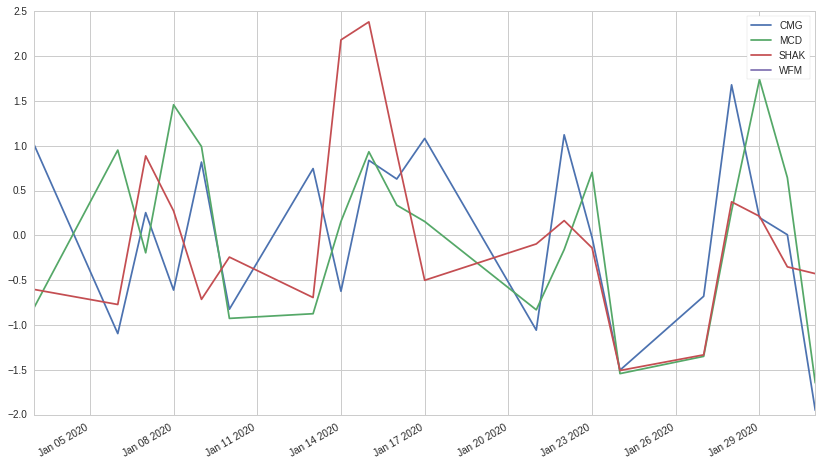

In [140]:
#estandarizando datos para graficarlos
retorno=(multiplicativo-multiplicativo.mean(axis=0))/multiplicativo.std(axis=0)
retorno.plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [141]:
"""rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns"""

'rolling_mean = pd.rolling_mean(prices, 30)\nrolling_mean.columns = prices.columns'

In [142]:
"""rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();"""

'rolling_mean.plot()\nplt.title("Rolling Mean of Prices")\nplt.xlabel("Date")\nplt.ylabel("Price")\nplt.legend();'

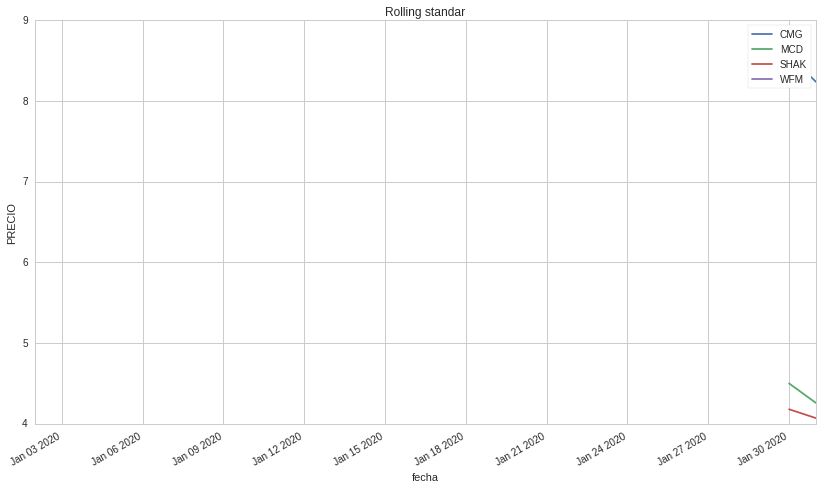

In [143]:
standar=pd.Series.rolling(precios,20).std()
standar.columns=precios.columns
standar.plot()
plt.title("Rolling standar")
plt.xlabel("fecha")
plt.ylabel("PRECIO")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*